# Heart Disease Classification
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

**Prepared by **

[Dataset Link](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

# Dataset Exploration

Required Libraries




In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting graphs
from pandas.plotting import parallel_coordinates
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split, GridSearchCV  # For data splitting and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For scaling the data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay  # For evaluating the models

# Importing machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier  # Ensemble models
from sklearn.tree import DecisionTreeClassifier  # Decision tree model
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors model
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.naive_bayes import GaussianNB # Naive Bayes model

In [ ]:
#Loading the dataset
heart_dataset= pd.read_csv('/content/heart.csv')

In [ ]:
#Number of rows & columns in the dataset
heart_dataset.shape

(1025, 14)

In [ ]:
# Basic information about the dataset
print("Dataset Head:")
heart_dataset.head()

Dataset Head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#first 5 rows and last 5 rows
heart_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
#Check for missing values
heart_dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#Statistical description of the dataset
print("Statistical Summary:")
heart_dataset.describe()

Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Interpretation and Visualization


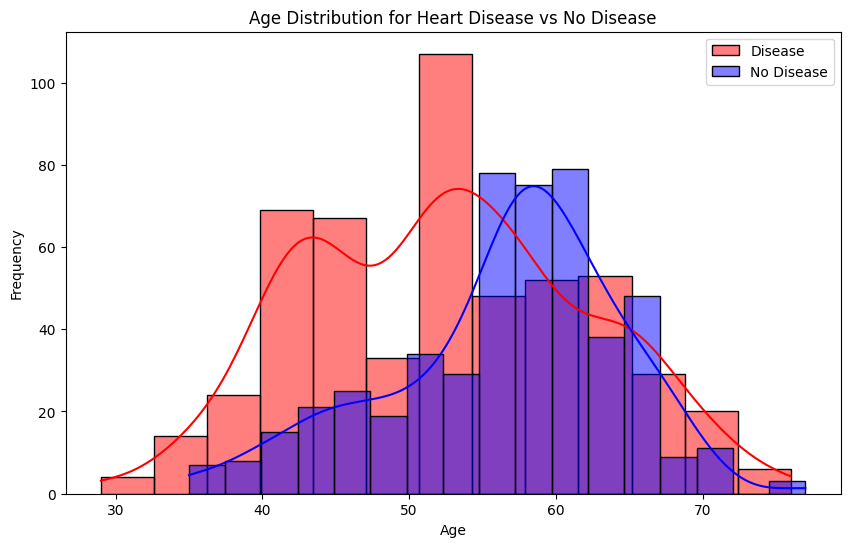

In [ ]:
# Visualize the distribution of age with respect to heart disease
plt.figure(figsize=(10, 6))
sns.histplot(heart_dataset[heart_dataset['target'] == 1]['age'], color='red', kde=True, label='Disease')
sns.histplot(heart_dataset[heart_dataset['target'] == 0]['age'], color='blue', kde=True, label='No Disease')
plt.title('Age Distribution for Heart Disease vs No Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

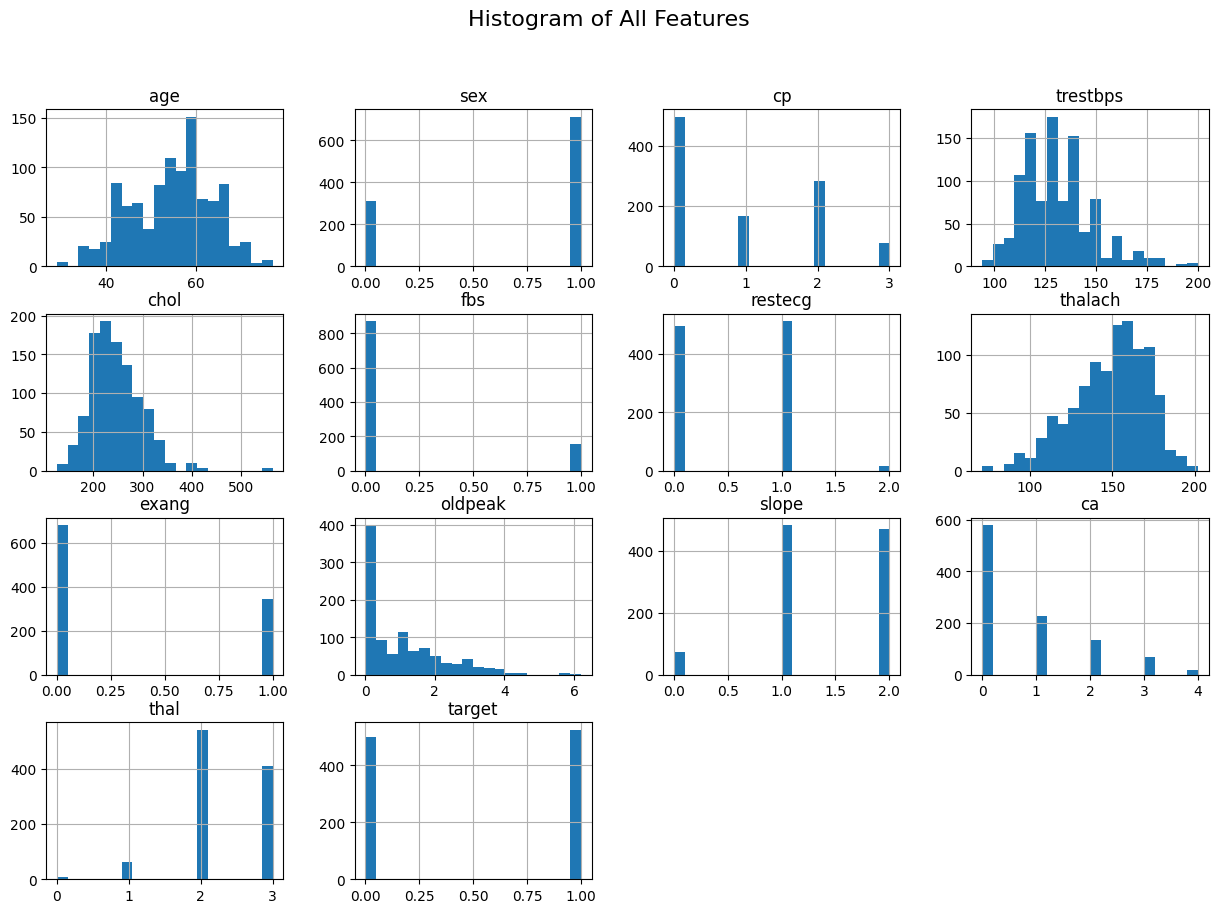

In [ ]:
#Histogram for all features
heart_dataset.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of All Features", fontsize=16)
plt.show()

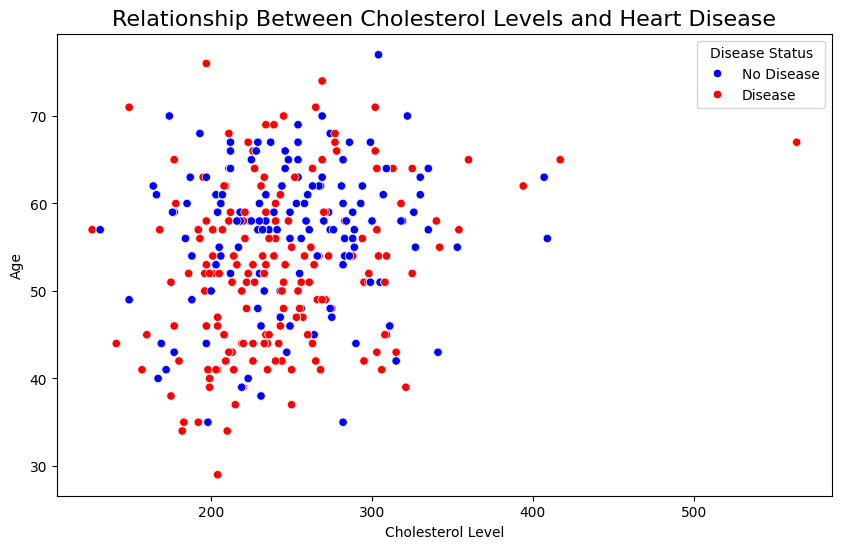

In [ ]:
#Cholesterol Level and Heart Disease
custom_palette = {0: "blue", 1: "red"}  # 0 (No Disease) = Blue, 1 (Disease) = Red

plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='age', hue='target', data=heart_dataset, palette=custom_palette)

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=['No Disease', 'Disease'], title='Disease Status')

plt.title('Relationship Between Cholesterol Levels and Heart Disease', fontsize=16)
plt.xlabel('Cholesterol Level')
plt.ylabel('Age')
plt.show()



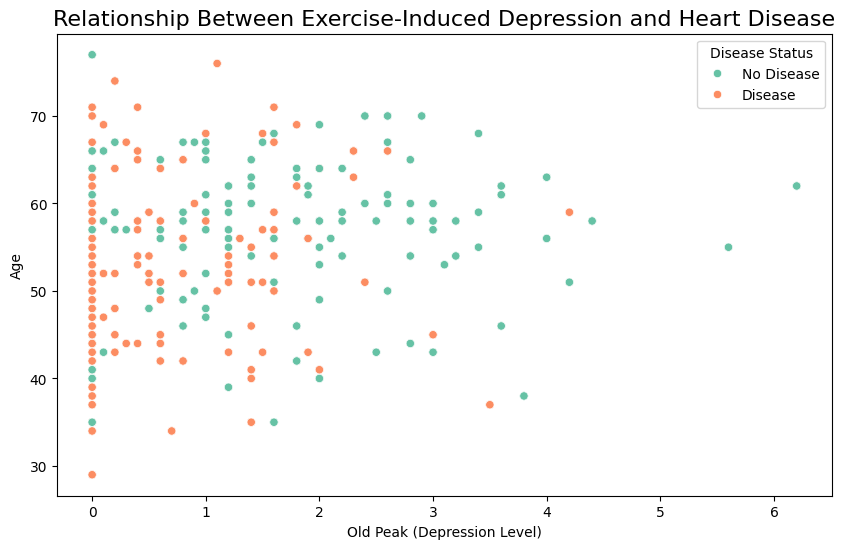

In [ ]:
#Depression and Heart Disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldpeak', y='age', hue='target', data=heart_dataset, palette="Set2")

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=['No Disease', 'Disease'], title='Disease Status')

plt.title('Relationship Between Exercise-Induced Depression and Heart Disease', fontsize=16)
plt.xlabel('Old Peak (Depression Level)')
plt.ylabel('Age')
plt.show()

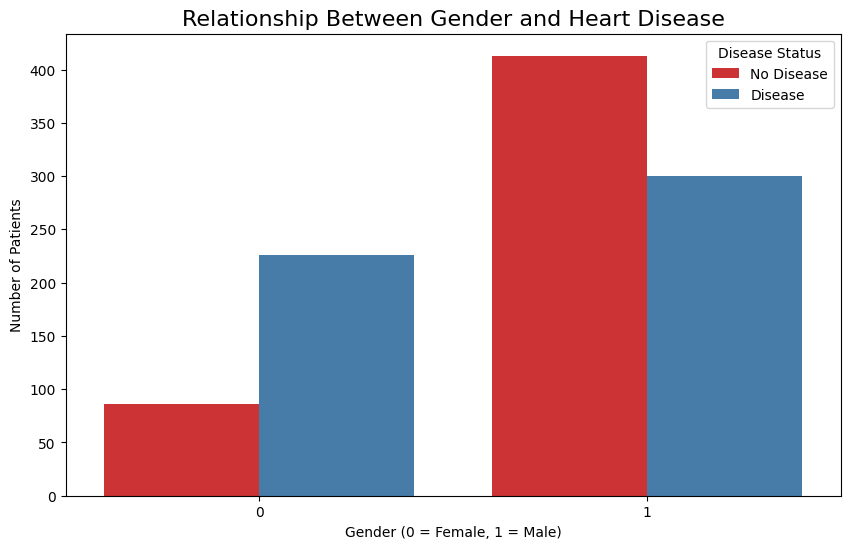

In [ ]:
# Gender and Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=heart_dataset, palette="Set1")
plt.title('Relationship Between Gender and Heart Disease', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Patients')
plt.legend(title='Disease Status', labels=['No Disease', 'Disease'])
plt.show()


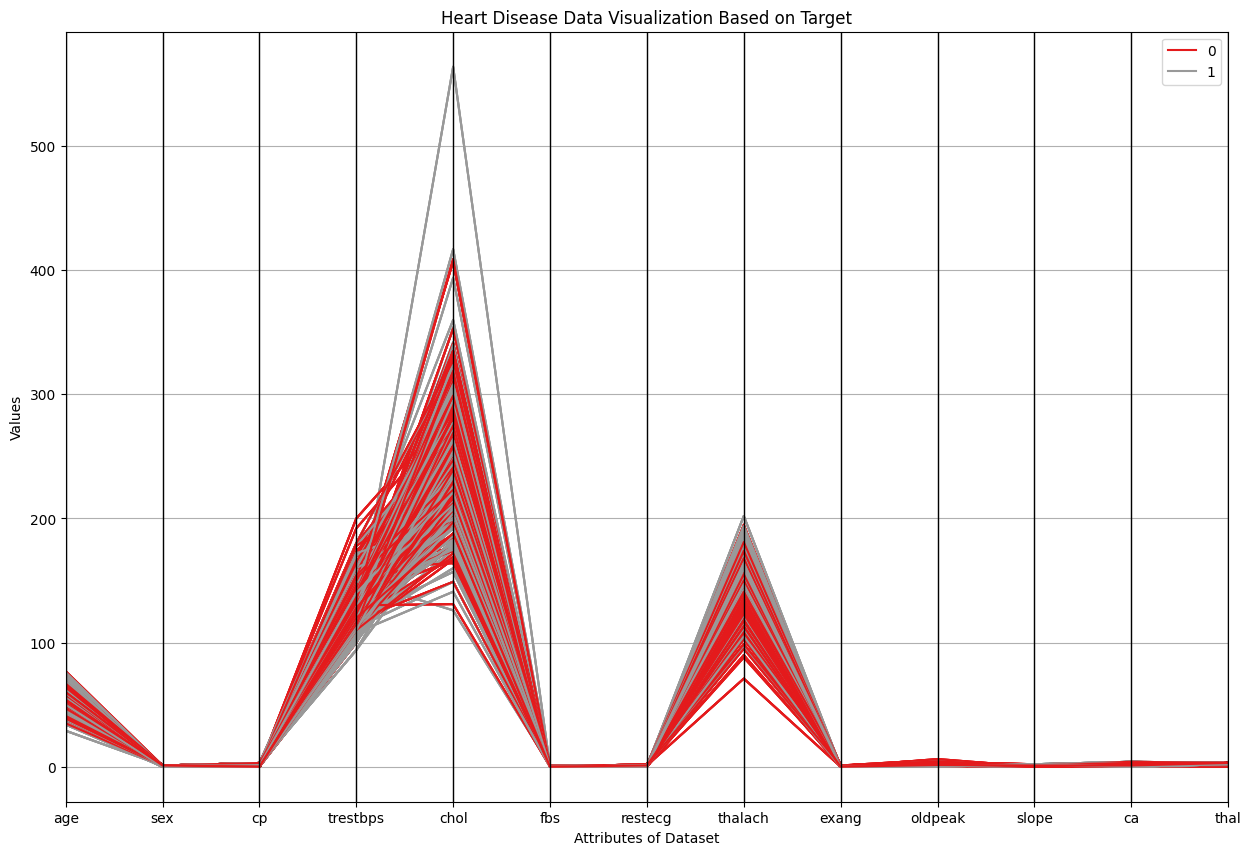

In [ ]:
plt.figure(figsize=(15, 10))

# The 'target' column indicates the presence of heart disease (0 - No Disease, 1 - Disease)
parallel_coordinates(heart_dataset, 'target', colormap=plt.get_cmap("Set1"))

plt.title("Heart Disease Data Visualization Based on Target")
plt.xlabel("Attributes of Dataset")
plt.ylabel("Values")

# Save the plot as a file
plt.savefig('heart_disease_parallel_coordinates.png')

plt.show()



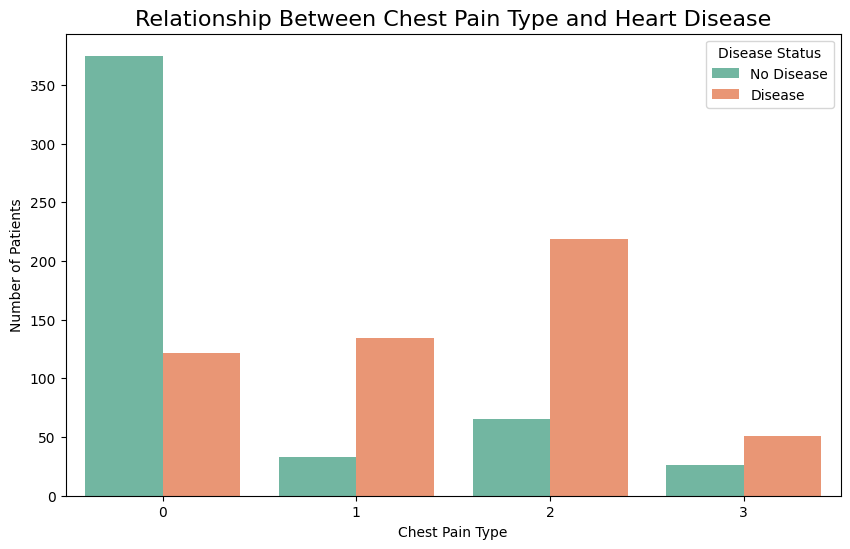

In [ ]:
# Chest Pain Type and Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=heart_dataset, palette="Set2")
plt.title('Relationship Between Chest Pain Type and Heart Disease', fontsize=16)
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.legend(title='Disease Status', labels=['No Disease', 'Disease'])
plt.show()


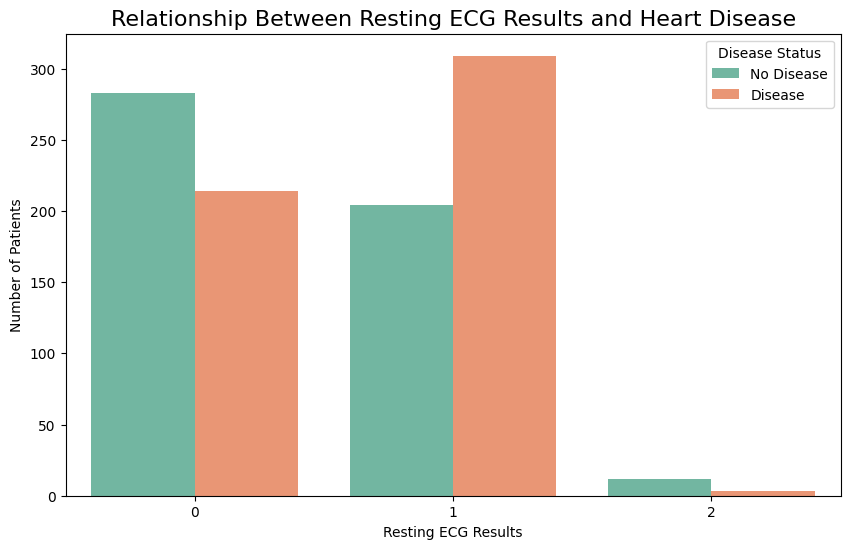

In [ ]:
#Resting ECG Results and Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='restecg', hue='target', data=heart_dataset, palette="Set2")
plt.title('Relationship Between Resting ECG Results and Heart Disease', fontsize=16)
plt.xlabel('Resting ECG Results')
plt.ylabel('Number of Patients')
plt.legend(title='Disease Status', labels=['No Disease', 'Disease'])
plt.show()


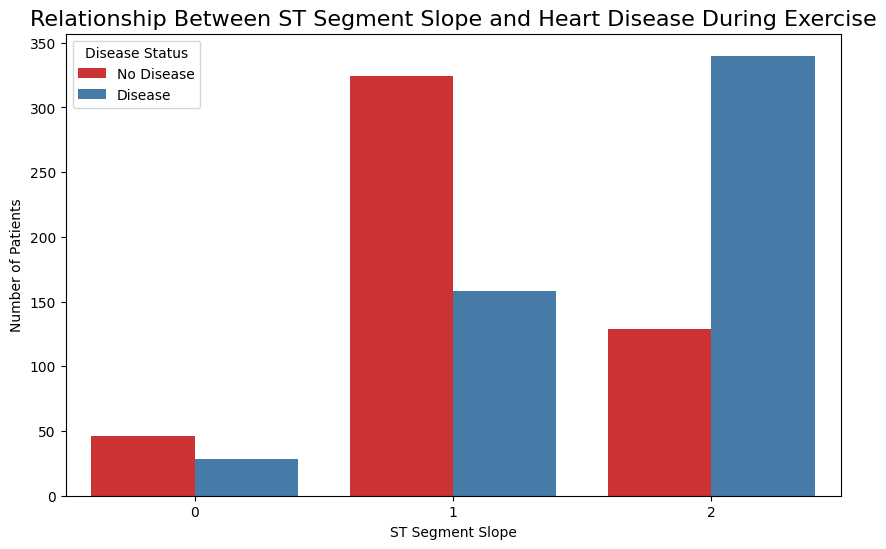

In [ ]:
# ST Segment Slope and Heart Disease During Exercise
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', hue='target', data=heart_dataset, palette="Set1")
plt.title('Relationship Between ST Segment Slope and Heart Disease During Exercise', fontsize=16)
plt.xlabel('ST Segment Slope')
plt.ylabel('Number of Patients')
plt.legend(title='Disease Status', labels=['No Disease', 'Disease'])
plt.show()


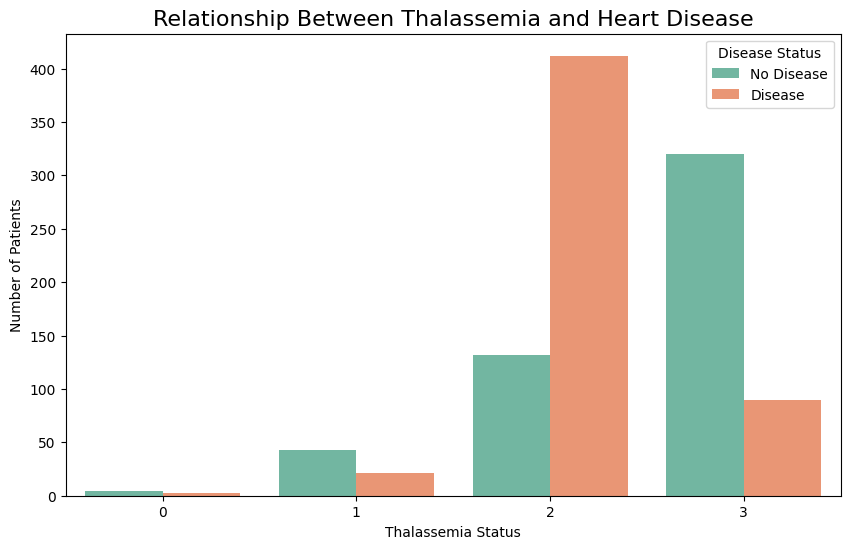

In [ ]:
# Thalassemia and Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='thal', hue='target', data=heart_dataset, palette="Set2")
plt.title('Relationship Between Thalassemia and Heart Disease', fontsize=16)
plt.xlabel('Thalassemia Status')
plt.ylabel('Number of Patients')
plt.legend(title='Disease Status', labels=['No Disease', 'Disease'])
plt.show()


**Correlation **


In [ ]:
correlation = heart_dataset.select_dtypes(include=['float64', 'int64']).corr()

<Axes: >

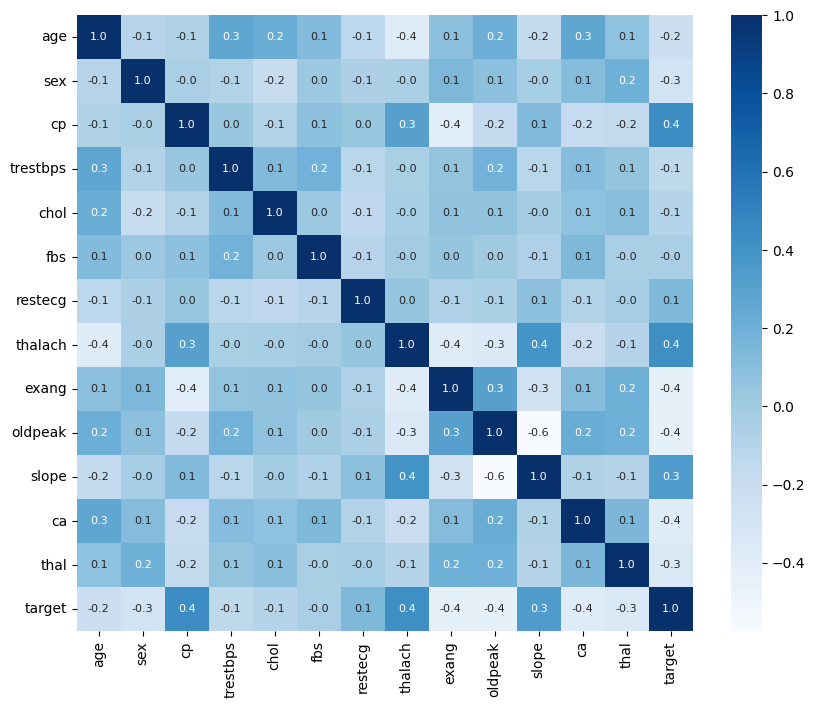

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

# Data Preprocessing

In [ ]:
# Separate features and target
X = heart_dataset.drop('target', axis=1)

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
Y = heart_dataset['target']

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Feature Selection

In [ ]:
feature_selector = RandomForestClassifier()

In [ ]:
feature_selector.fit(X, Y)

RandomForestClassifier()

In [ ]:
# Feature importance
feature_importances = pd.Series(feature_selector.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
ca          0.125708
cp          0.123889
oldpeak     0.118057
thal        0.113771
thalach     0.111124
age         0.088860
chol        0.072452
trestbps    0.070338
exang       0.061347
slope       0.050095
sex         0.034906
restecg     0.019161
fbs         0.010293
dtype: float64


In [ ]:
# Select top features
selected_features = feature_importances.nlargest(10).index
X = X[selected_features]

# Model Selection

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Model Training and Evaluation

In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1025,) (820,) (205,)


In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(Y_test, predictions),
        "Precision": precision_score(Y_test, predictions),
        "Recall": recall_score(Y_test, predictions),
        "F1 Score": f1_score(Y_test, predictions)
    }

print("Model Evaluation Results:")
for name, metrics in results.items():
    print(name)
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")

Model Evaluation Results:
Decision Tree
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00
Random Forest
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.97
  F1 Score: 0.98
Support Vector Machine
  Accuracy: 0.91
  Precision: 0.86
  Recall: 0.96
  F1 Score: 0.91
K-Nearest Neighbors
  Accuracy: 0.86
  Precision: 0.82
  Recall: 0.90
  F1 Score: 0.86
Logistic Regression
  Accuracy: 0.82
  Precision: 0.76
  Recall: 0.91
  F1 Score: 0.83
Gradient Boosting
  Accuracy: 0.95
  Precision: 0.94
  Recall: 0.96
  F1 Score: 0.95
AdaBoost
  Accuracy: 0.89
  Precision: 0.85
  Recall: 0.94
  F1 Score: 0.89
Bagging
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.97
  F1 Score: 0.98
Naive Bayes
  Accuracy: 0.81
  Precision: 0.77
  Recall: 0.87
  F1 Score: 0.82


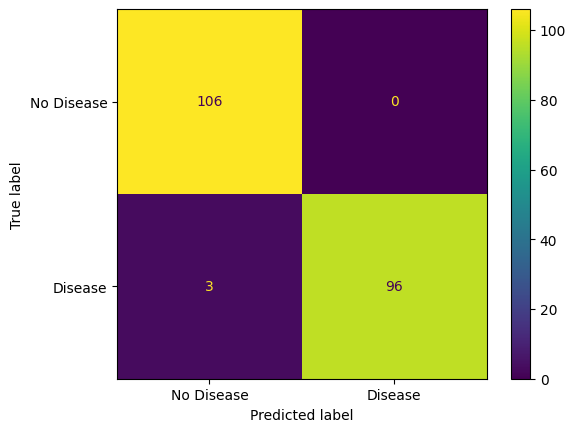

In [ ]:
# Confusion Matrix
final_model = RandomForestClassifier()
final_model.fit(X_train, Y_train)
final_predictions = final_model.predict(X_test)
cm = confusion_matrix(Y_test, final_predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=["No Disease", "Disease"])
cmd.plot()
plt.show()

# Finding Best Performance

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, Y_train)
final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(Y_test, final_predictions)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9853658536585366


In [ ]:

best_metric = 0
best_metric_name = "F1 Score"

for name, metrics in results.items():
    if metrics[best_metric_name] > best_metric:
        best_metric = metrics[best_metric_name]
        best_model = name

In [ ]:
print(f"Best Model: {best_model} with {best_metric_name} = {best_metric:.2f}")

Best Model: Decision Tree with F1 Score = 1.00


# Example

In [ ]:
# Example input data
input_data = (52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0)

input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data for a single instance prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if prediction[0] == 1:
    print("Heart Disease Detected")
else:
    print("No Heart Disease")

No Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Calculating training and test accuracy

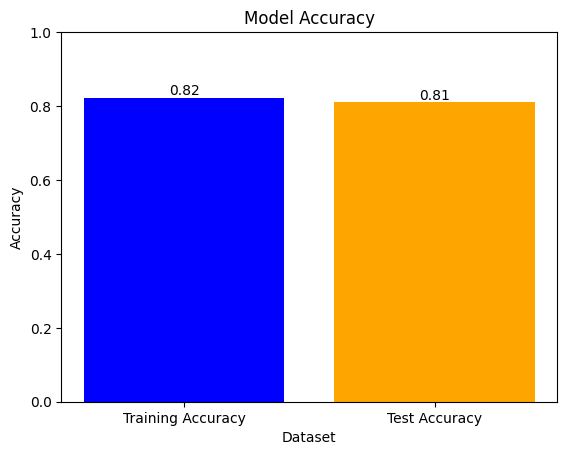

In [ ]:
# Calculate training and test accuracy
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

# List of accuracies
accuracies = [train_accuracy, test_accuracy]

labels = ['Training Accuracy', 'Test Accuracy']
colors = ['blue', 'orange']

plt.bar(labels, accuracies, color=colors)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Dataset")
plt.text(0, train_accuracy, f"{train_accuracy:.2f}", ha='center', va='bottom', fontsize=10)
plt.text(1, test_accuracy, f"{test_accuracy:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()
